# Introduction

### Exploring the patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla or something about the actual unemployment rate!!!

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [32]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')


# Data Exploration

### Tesla

In [33]:
largest_value = df_tesla['TSLA_WEB_SEARCH'].max()
smallest_vlaue = df_tesla['TSLA_WEB_SEARCH'].min()
print(f'Largest value for Tesla in Web Search: {largest_value}')
print(f'Smallest value for Tesla in Web Search: {smallest_vlaue}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [34]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [35]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [36]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [37]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [38]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [39]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

#### Check for Missing Values

In [40]:
print(f'Missing values for Tesla: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC price: {df_btc_price.isna().values.any()}')

Missing values for Tesla: False
Missing values for U/E: False
Missing values for BTC Search: False
Missing values for BTC price: True


In [41]:
print(f'Number of missing values: {df_btc_price.isna().values.any().sum()}')

Number of missing values: 1


#### Removing missing values. 

In [42]:
df_btc_price.dropna(inplace=True)
df_btc_price.isna().any()


DATE      False
CLOSE     False
VOLUME    False
dtype: bool

### Converting Strings to DateTime Objects

In [43]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])


In [44]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])


In [45]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])


In [46]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])


### Converting from Daily to Monthly Data for BTC


In [47]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_price_monthly.head()
df_tesla.MONTH.min()

Timestamp('2010-06-01 00:00:00')

# Data Visualisation

### Tesla case study

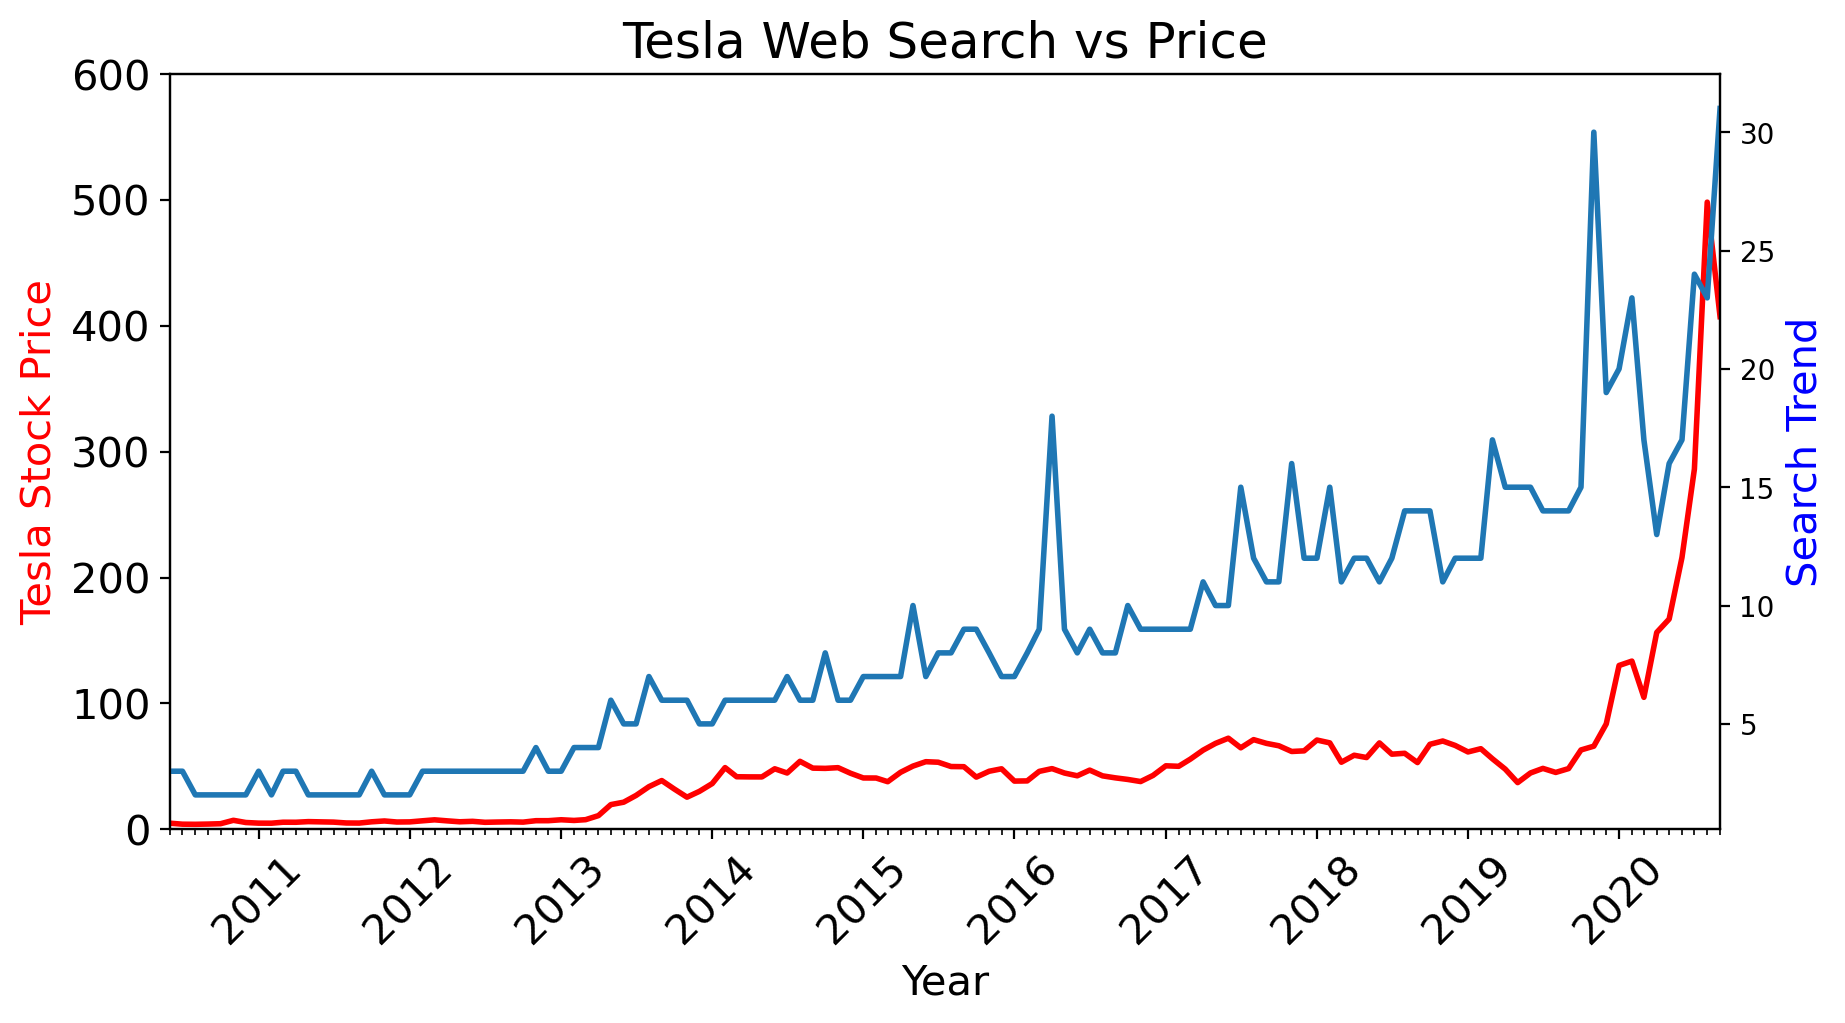

In [48]:
# Create locators for ticks on the time axis
# BTC Price & Search Trend
plt.figure(figsize=(10,5), dpi=200) 
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.title('Tesla Web Search vs Price', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color = 'r', linewidth=2)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], linewidth=2)
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Tesla Stock Price', color='red', fontsize=15)
ax2.set_ylabel('Search Trend', color='blue',fontsize=15)
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0, 600])

# Inserting Minor Ticks (for date-Time)
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


plt.show()


### We can clearly see that there is a relation between Tesla stock prices and the Google Search trends for Tesla

## Bitcoin Case Study

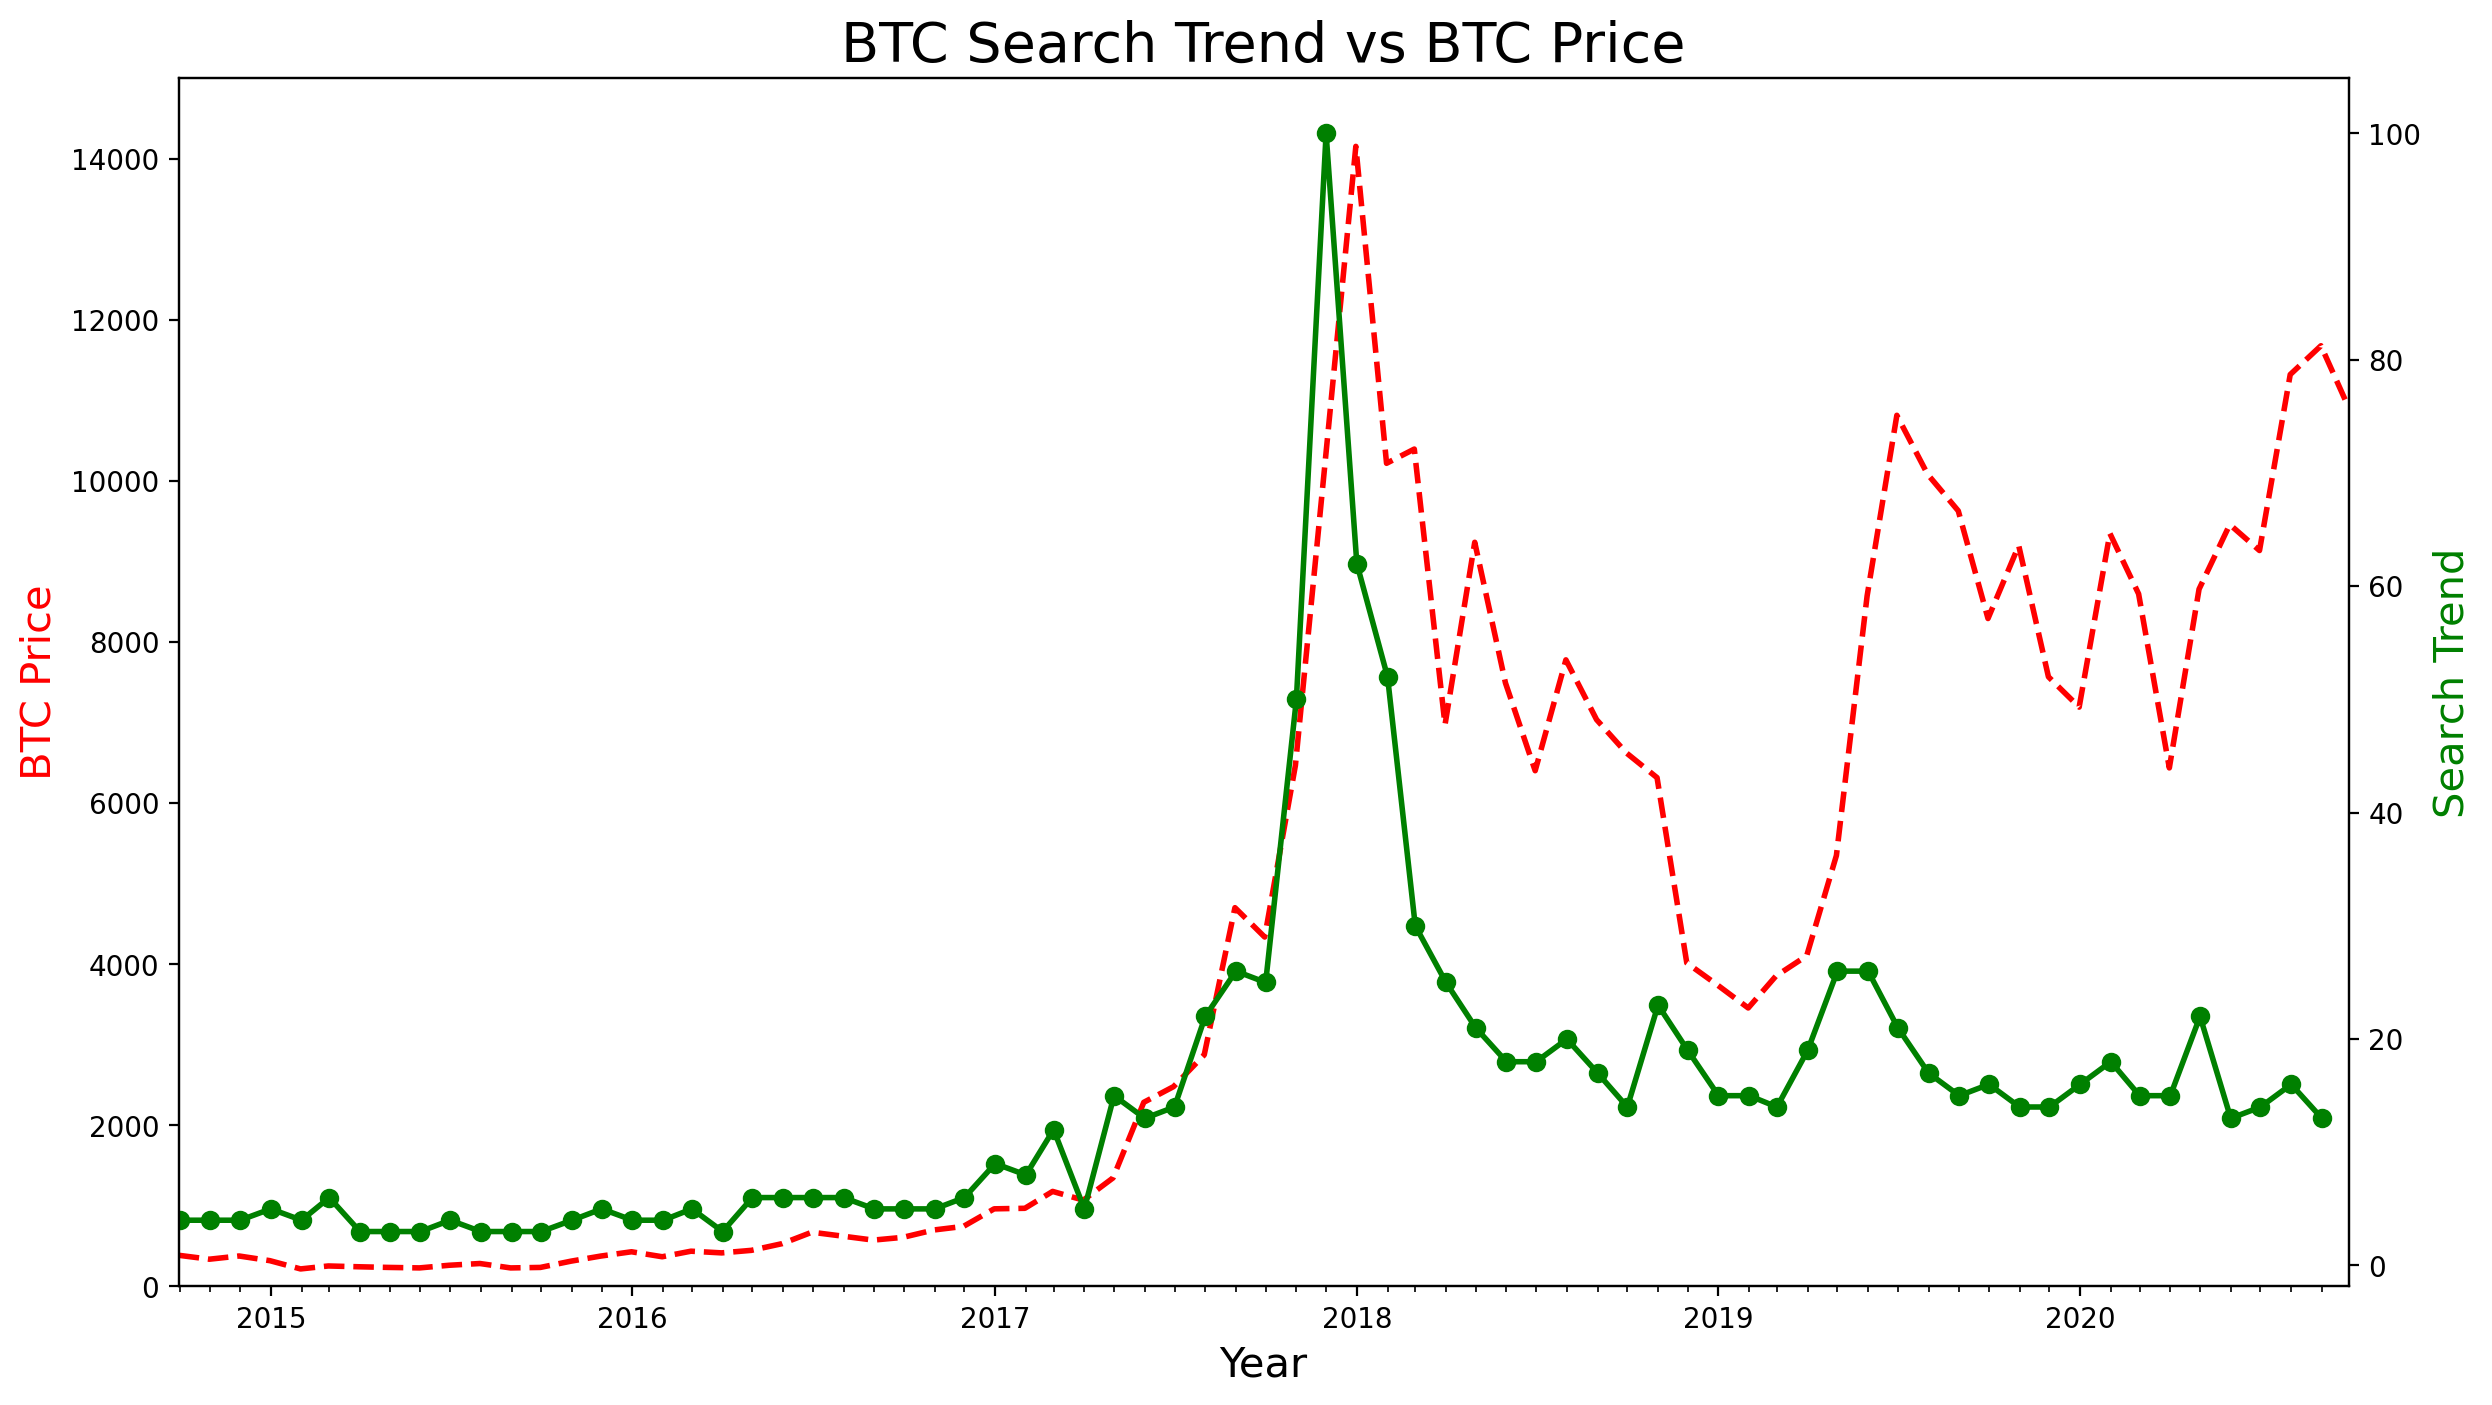

In [49]:
# initial touch
plt.figure(figsize=(14,8), dpi=200 )
plt.title('BTC Search Trend vs BTC Price', fontsize= 20)

# forming axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_btc_price_monthly['DATE'], df_btc_price_monthly['CLOSE'], color = 'r', linewidth = 2, linestyle='dashed')
ax2.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color = 'green', linewidth = 2,  marker='o')

#labels
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('BTC Price', color = 'red', fontsize = 15)
ax2.set_ylabel('Search Trend', color = 'green', fontsize = 15)

# stting limits

ax1.set_ylim(0, 15000)
ax1.set_xlim(df_btc_price_monthly['DATE'].min() ,df_btc_price_monthly['DATE'].max())

# inserting ticks

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()


### Again in this chart we can observe the relation between BTC prices and the Google Search trends for Tesla.

## Unemployement Rate Case Study

In [50]:
# Averaging out 6 values for smooth graph

df_unemployment.shape
df_roll_ue = df_unemployment.rolling(window=6).mean()


C:\Users\bhanurat\AppData\Local\Temp\ipykernel_20396\1832439681.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['MONTH'], dtype='object')
  df_roll_ue = df_unemployment.rolling(window=6).mean()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

(12418.0, 17897.0)

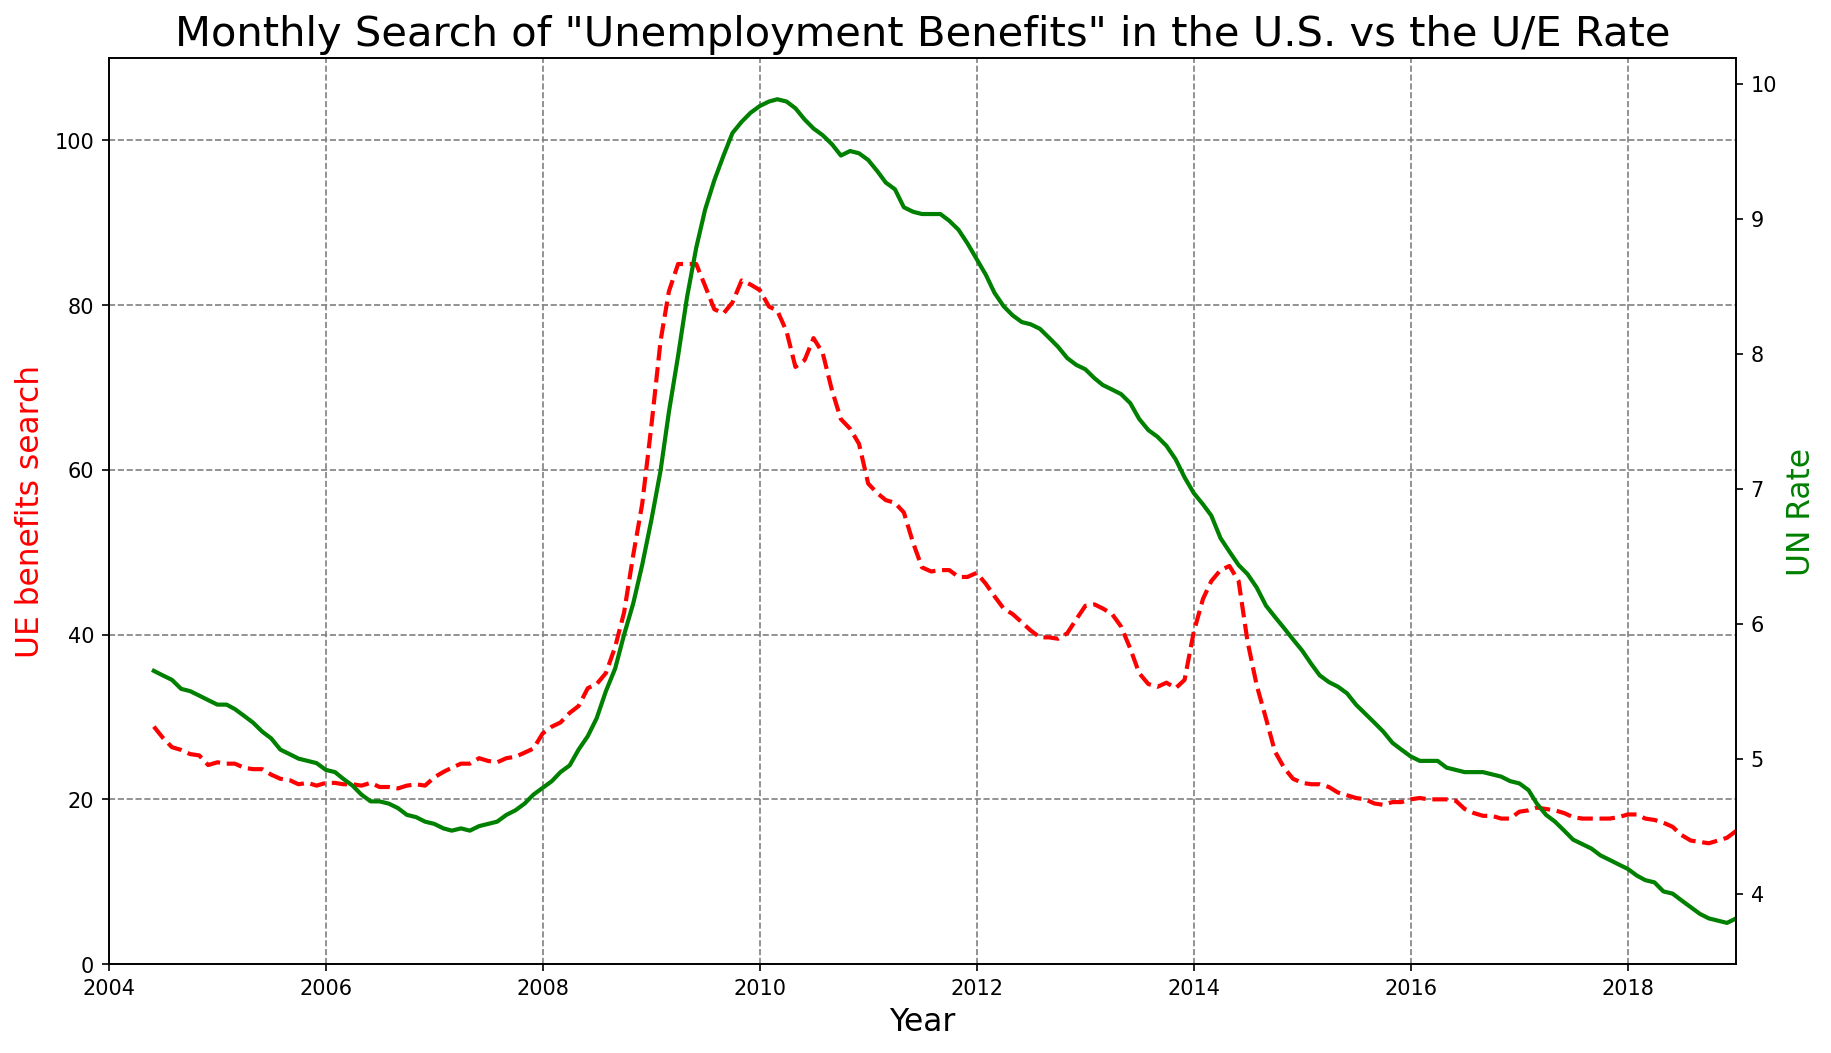

In [51]:

# initial touch

plt.figure(figsize=(14, 8), dpi = 150)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)

# creating axis

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_unemployment['MONTH'], df_roll_ue['UE_BENEFITS_WEB_SEARCH'], color = 'r', linewidth = 2, linestyle='dashed')
ax2.plot(df_unemployment['MONTH'], df_roll_ue['UNRATE'], color = 'g', linewidth = 2)

ax1.grid(color='grey', linestyle='--')



# creating labels

ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('UE benefits search', color = 'red', fontsize = 15)
ax2.set_ylabel('UN Rate', color = 'green', fontsize = 15)

# setting limit 
ax1.set_ylim(0, 110)
ax1.set_xlim(df_unemployment['MONTH'].min() ,df_unemployment['MONTH'].max())



**The effects of 2008 financial crisis can be observed here. Search trends related to unemployemt rose with the employment rate. It almost took 10 Years for the unemployment rate to go back to where it was prior to the crisis.**


# Effects of COVID

### Including 2020 in Unemployment Charts

In [52]:
# Reading Data
df = pd.read_csv(r"UE Benefits Search vs UE Rate 2004-20.csv")

# Cleaning Data
df['MONTH'] = pd.to_datetime(df['MONTH'])



(12418.0, 18475.0)

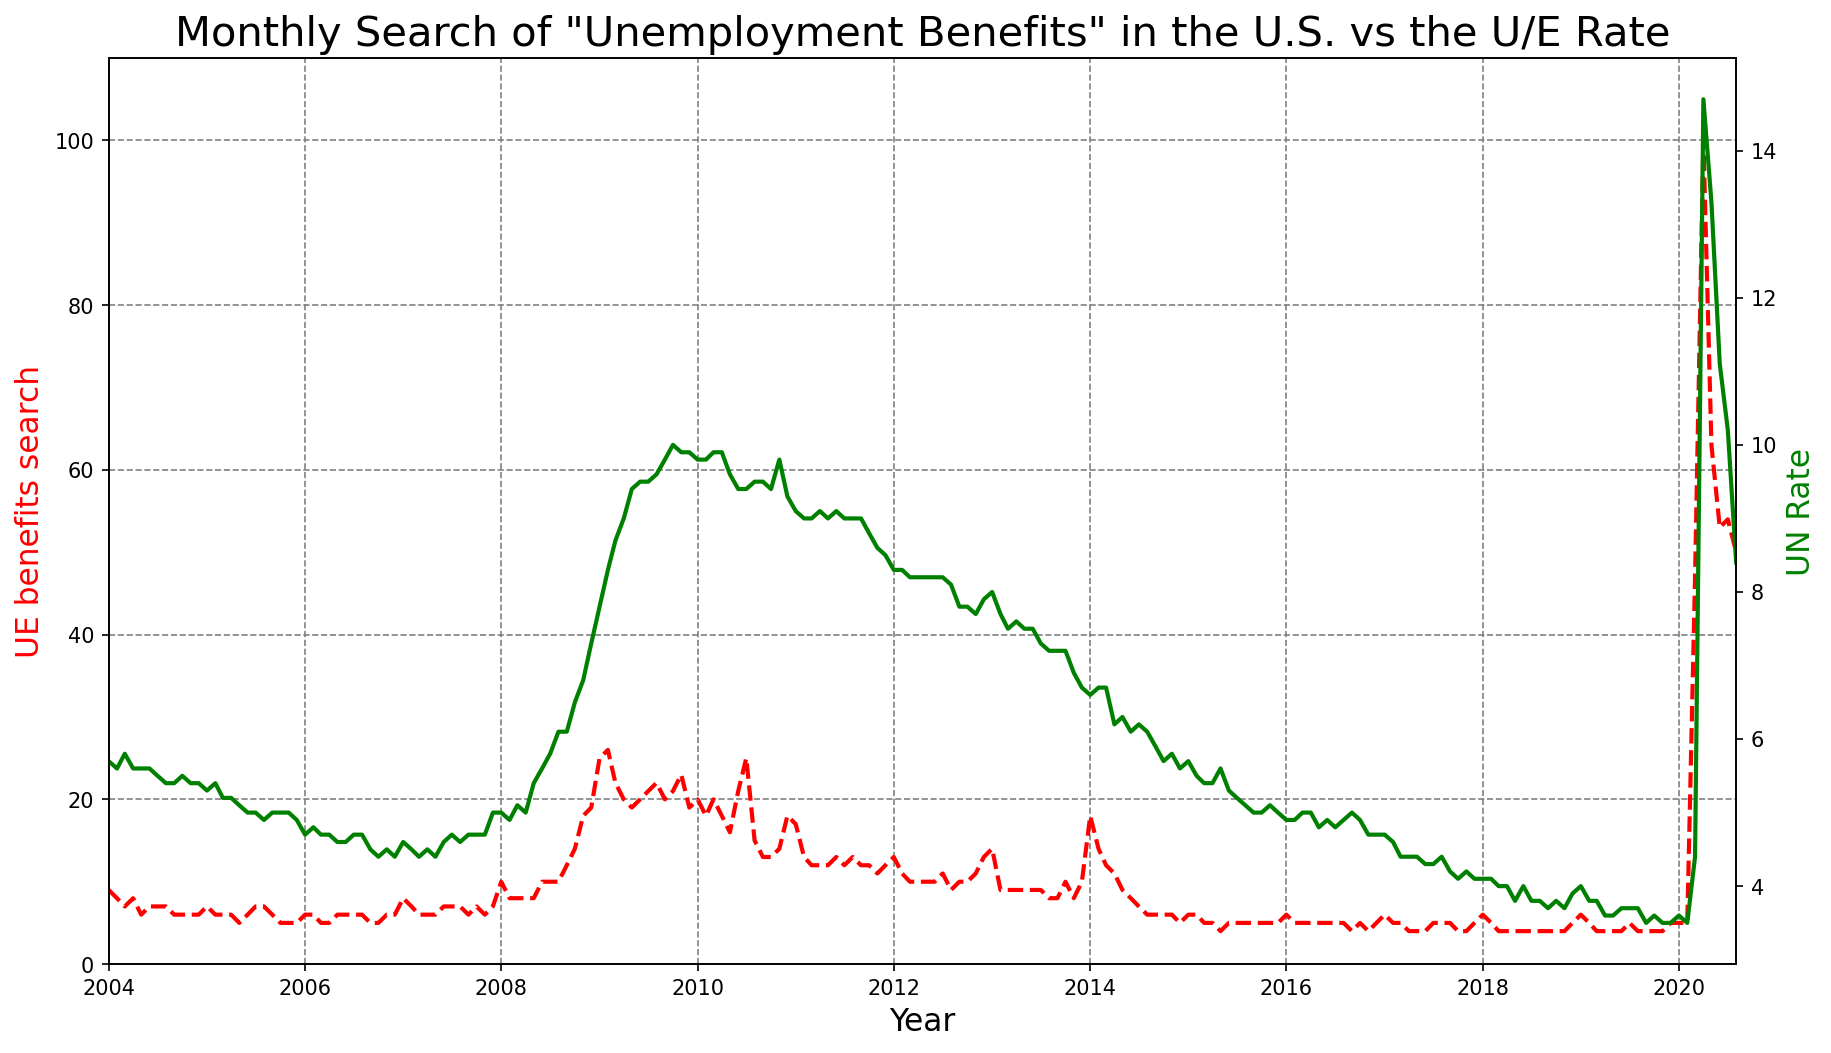

In [53]:
# Plotting Graph

plt.figure(figsize=(14, 8), dpi = 150)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)

# creating axis

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df['MONTH'], df['UE_BENEFITS_WEB_SEARCH'], color = 'r', linewidth = 2, linestyle='dashed')
ax2.plot(df['MONTH'], df['UNRATE'], color = 'g', linewidth = 2)

ax1.grid(color='grey', linestyle='--')



# creating labels

ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('UE benefits search', color = 'red', fontsize = 15)
ax2.set_ylabel('UN Rate', color = 'green', fontsize = 15)

# setting limit 
ax1.set_ylim(0, 110)
ax1.set_xlim(df['MONTH'].min() ,df['MONTH'].max())

# Effect of COVID: A huge spike in Unemployement Rate and Google search trends related to it!!